# Make Logbook of Trim images of CTIO Data
==================================================================================================

- author : Sylvie Dagoret-Campagne
- date   : December 1st 2016

- update : December 3rd 2016

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from astropy.modeling import models
from astropy import units as u
from astropy import nddata
from astropy.io import fits
from astropy.table import Table, Column
import re
import os

In [9]:
import pandas as pd

In [10]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

## Location of trim images
----------------------------------

In [11]:
#rootpath_rawimage="/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/CTIOData2016/November2016/HD14943"
#object_name='HD14943'

In [12]:
rootpath_rawimage="/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/CTIOData2016/November2016/mucol"
object_name='mucol'
infos='ctioNov2016'

In [13]:
logfile='logbk_'+object_name+'_'+infos+'.fits'

In [14]:
dirlist_all=os.listdir(rootpath_rawimage) 

In [15]:
dirlist_all.remove('.DS_Store') # reove that file in a mAC
dirlist_all

['2016_11_23T04_03_03',
 '2016_11_23T04_04_27',
 '2016_11_23T04_05_50',
 '2016_11_24T02_11_53',
 '2016_11_24T02_13_06',
 '2016_11_24T02_14_20',
 '2016_11_24T02_28_42',
 '2016_11_24T02_29_55',
 '2016_11_24T02_31_09',
 '2016_11_24T03_43_50',
 '2016_11_24T03_45_03',
 '2016_11_24T03_46_17',
 '2016_11_24T04_01_50',
 '2016_11_24T04_03_04',
 '2016_11_24T04_04_17',
 '2016_11_24T05_37_07',
 '2016_11_24T05_38_20',
 '2016_11_24T05_39_34',
 '2016_11_24T05_55_27',
 '2016_11_24T05_56_40',
 '2016_11_24T05_57_54',
 '2016_11_25T01_35_37',
 '2016_11_25T01_36_50',
 '2016_11_25T01_38_04',
 '2016_11_25T01_51_34',
 '2016_11_25T01_52_47',
 '2016_11_25T01_54_00',
 '2016_11_25T03_12_27',
 '2016_11_25T03_13_41',
 '2016_11_25T03_14_54',
 '2016_11_25T03_28_25',
 '2016_11_25T03_29_38',
 '2016_11_25T03_30_52',
 '2016_11_25T04_43_25',
 '2016_11_25T04_44_39',
 '2016_11_25T04_45_52',
 '2016_11_25T04_59_22',
 '2016_11_25T05_00_36',
 '2016_11_25T05_01_49',
 '2016_11_25T05_59_13',
 '2016_11_25T06_00_27',
 '2016_11_25T06_

In [16]:
index=0
indexes_files= []
filelist_fitsimages= []
for dir in dirlist_all: # loop on directories, one per image       
        dir_leaf= rootpath_rawimage+'/'+dir # build the name of leaf directory
        listfiles=os.listdir(dir_leaf) 
        for filename in listfiles:
            if re.search('^calibrated.*fits.gz$',filename):  #example of filename filter
                index=index+1
                shortfilename=dir_leaf+'/'+filename
                filelist_fitsimages.append(shortfilename)
                indexes_files.append(index)

### Build tables for output file

In [17]:
all_headers = []
all_dates = []
all_airmass = []
all_exposures = []
all_ut = []
all_ra = []
all_dec = []
all_epoch = []
all_zenith = []
all_ha = []
all_st = []
all_alt = []
all_focus = []
all_temp = []
all_press = []
all_hum = []
all_windsp = []
all_seeing = []
all_seeingam = []

for idx,file in np.ndenumerate(filelist_fitsimages):   
    hdu_list=fits.open(file)
    header=hdu_list[0].header
    date_obs = header['DATE-OBS']
    airmass = float(header['AIRMASS'])
    expo= float(header['EXPTIME'])
    num=indexes_files[idx[0]]
    all_dates.append(date_obs)
    all_airmass.append(airmass)
    all_headers.append(header)
    all_exposures.append(expo)
   
    ut=header['UT']
    ra=header['RA']
    dec=header['DEC']
    epoch=float(header['EPOCH'])
    zd = float(header['ZD'])
    ha = header['HA']
    st = header['ST']
    alt = float(header['ALT'])
    fcl = float(header['TELFOCUS'])
    temp= float(header['OUTTEMP'])
    press= float(header['OUTPRESS'])
    hum= float(header['OUTHUM'])
    windsp=float(header['WNDSPEED'])
    seeing=float(header['SEEING'])
    seeingam=float(header['SAIRMASS'])
    
    all_ut.append(ut)
    all_ra.append(ra)
    all_dec.append(dec)
    all_epoch.append(epoch)
    all_zenith.append(zd)
    all_ha.append(ha)
    all_st.append(st)
    all_alt.append(alt)
    all_focus.append(fcl)
    all_temp.append(temp)
    all_press.append(press)
    all_hum.append(hum)
    all_windsp.append(windsp)
    all_seeing.append(seeing)
    all_seeingam.append(seeingam)

    hdu_list.close()
    

## Build outputfile

In [18]:
col_airmass=np.array(all_airmass)
col_number=np.array(indexes_files)
col_date=np.array(all_dates)
col_filename=np.array(dirlist_all)
col_exposure=np.array(all_exposures)
col_zenith=np.array(all_zenith)
col_altitude=np.array(all_alt)
col_temperature=np.array(all_temp)
col_pressure=np.array(all_press)
col_humidity=np.array(all_hum)
col_windsp=np.array(all_windsp)
col_seeing=np.array(all_seeing)


In [19]:
c1 = fits.Column(name='number', format='J', array=col_number)
c2 = fits.Column(name='airmass', format='E', array=col_airmass)
c3 = fits.Column(name='date', format='A50', array=col_date)
c4 = fits.Column(name='filename', format='A30', array=col_filename)
c5 = fits.Column(name='exposure', format='E', array=col_exposure) 
c6 = fits.Column(name='zenith', format='E', array=col_zenith) 
#c7 = fits.Column(name='altitude', format='E', array=col_altitude) 
c8 = fits.Column(name='temperature', format='E', array=col_temperature) 
c9 = fits.Column(name='pressure', format='E', array=col_pressure) 
c10 = fits.Column(name='humidity', format='E', array=col_humidity) 
c11 = fits.Column(name='windspeed', format='E', array=col_windsp) 
c12 = fits.Column(name='seeing', format='E', array=col_seeing) 


In [20]:
tbhdu = fits.BinTableHDU.from_columns([c1, c2, c3, c4, c5,c6,c8,c9,c10,c11,c12])

In [21]:
tbhdu.writeto(logfile,clobber=True)

## Convert into Table
---------------------------

In [22]:
thetable= Table(tbhdu.data)

In [23]:
thetable.show_in_notebook()

number,airmass,date,filename,exposure,zenith,temperature,pressure,humidity,windspeed,seeing
1,1.146,2016-11-23T04:02:21.620,2016_11_23T04_03_03,40.0,29.306,7.5,775.0,70.0,3.9,1.945
2,1.143,2016-11-23T04:03:45.142,2016_11_23T04_04_27,40.0,29.012,7.4,775.0,70.0,5.0,2.333
3,1.14,2016-11-23T04:05:08.661,2016_11_23T04_05_50,40.0,28.718,7.3,775.0,70.0,4.9,1.772
4,1.608,2016-11-24T02:11:21.323,2016_11_24T02_11_53,30.0,51.614,8.2,778.0,59.0,6.2,1.767
5,1.599,2016-11-24T02:12:34.838,2016_11_24T02_13_06,30.0,51.363,8.1,778.0,60.0,5.6,2.083
6,1.591,2016-11-24T02:13:48.347,2016_11_24T02_14_20,30.0,51.112,8.0,778.0,60.0,5.6,1.896
7,1.498,2016-11-24T02:28:09.918,2016_11_24T02_28_42,30.0,48.161,8.1,778.0,60.0,8.7,2.26
8,1.49,2016-11-24T02:29:23.432,2016_11_24T02_29_55,30.0,47.909,8.2,778.0,60.0,8.1,2.087
9,1.483,2016-11-24T02:30:36.937,2016_11_24T02_31_09,30.0,47.656,8.2,778.0,60.0,8.6,2.258
10,1.185,2016-11-24T03:43:18.316,2016_11_24T03_43_50,30.0,32.484,8.4,778.0,54.0,7.9,1.859


## Read the logfile into a Table
---------------------------------------

In [24]:
t = Table.read(logfile)

In [25]:
t

number,airmass,date,filename,exposure,zenith,temperature,pressure,humidity,windspeed,seeing
int32,float32,str50,str30,float32,float32,float32,float32,float32,float32,float32
1,1.146,2016-11-23T04:02:21.620,2016_11_23T04_03_03,40.0,29.306,7.5,775.0,70.0,3.9,1.945
2,1.143,2016-11-23T04:03:45.142,2016_11_23T04_04_27,40.0,29.012,7.4,775.0,70.0,5.0,2.333
3,1.14,2016-11-23T04:05:08.661,2016_11_23T04_05_50,40.0,28.718,7.3,775.0,70.0,4.9,1.772
4,1.608,2016-11-24T02:11:21.323,2016_11_24T02_11_53,30.0,51.614,8.2,778.0,59.0,6.2,1.767
5,1.599,2016-11-24T02:12:34.838,2016_11_24T02_13_06,30.0,51.363,8.1,778.0,60.0,5.6,2.083
6,1.591,2016-11-24T02:13:48.347,2016_11_24T02_14_20,30.0,51.112,8.0,778.0,60.0,5.6,1.896
7,1.498,2016-11-24T02:28:09.918,2016_11_24T02_28_42,30.0,48.161,8.1,778.0,60.0,8.7,2.26
8,1.49,2016-11-24T02:29:23.432,2016_11_24T02_29_55,30.0,47.909,8.2,778.0,60.0,8.1,2.087
9,1.483,2016-11-24T02:30:36.937,2016_11_24T02_31_09,30.0,47.656,8.2,778.0,60.0,8.6,2.258


## Convert into pandas to plot
---------------------------------------

In [26]:
df = t.to_pandas()

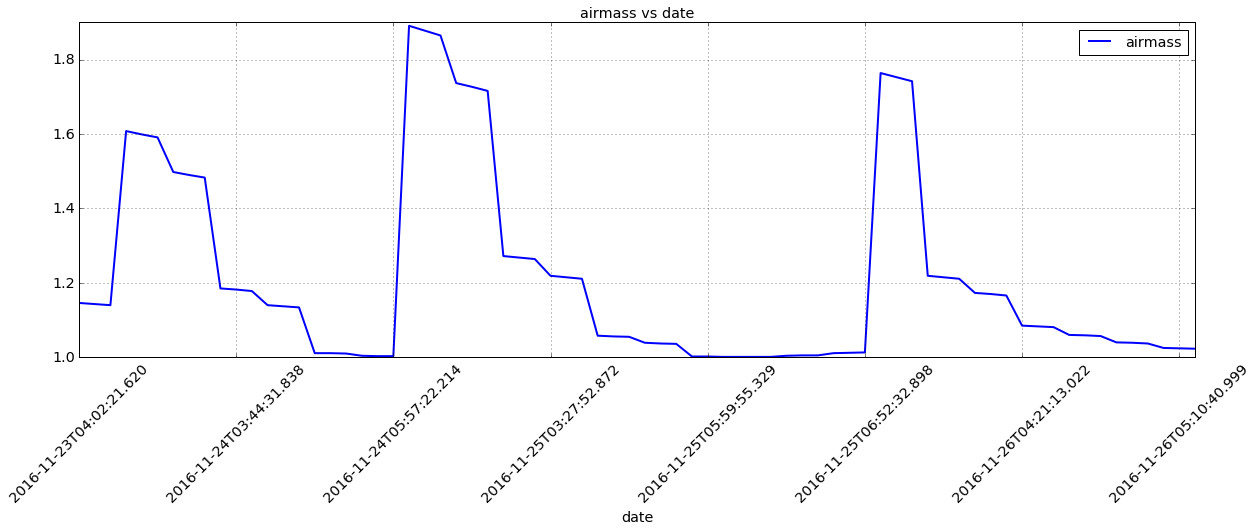

In [27]:
df.plot('date','airmass',figsize=(20,6),rot=45,grid=True,title='airmass vs date',color='b',linewidth=2)
